In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

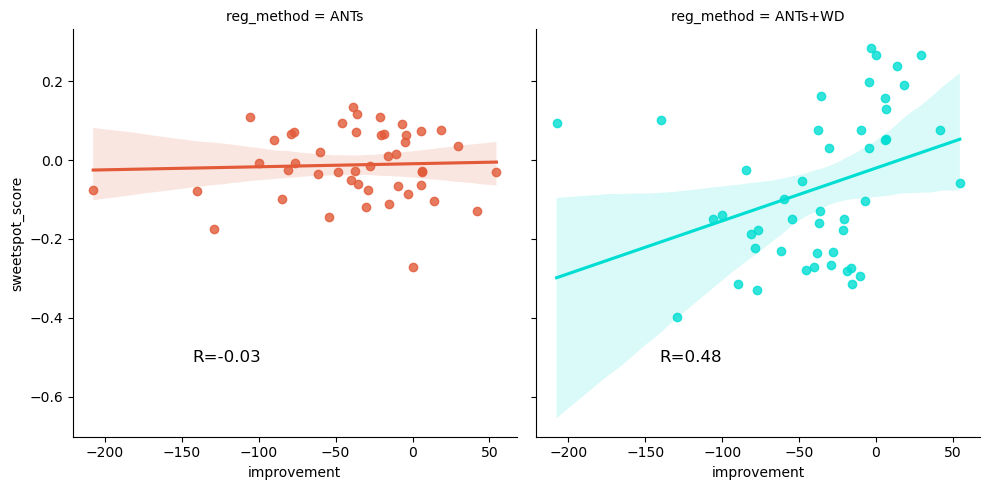

In [2]:
root_path = os.path.dirname(os.path.abspath("Figure-4.ipynb"))
scores = pd.read_csv(os.path.join(root_path, 'Figure-4.csv'))
scores.drop(scores.index[scores.reg_method=='EasyReg'], inplace=True)
palette = {"ANTs":"#E25A38", "ANTs+WD":"#00DED3"}
g = sns.lmplot(x="improvement", y="sweetspot_score", hue="reg_method",col="reg_method", data=scores, palette=palette)
axes = g.axes
for j,reg_method in enumerate(['ANTs', 'ANTs+WD']):
    x1 = scores.loc[scores.reg_method==reg_method, 'improvement']
    x2 = scores.loc[scores.reg_method==reg_method, 'sweetspot_score']
    res = stats.spearmanr(x1, x2, nan_policy='omit')
    text_kwargs = dict(ha='center', va='center', fontsize=12, color='black')
    axes[0,j].text(axes[0,j].get_xlim()[0]+100, axes[0,j].get_ylim()[0]+0.2, 'R=%.2f'%(res.statistic), **text_kwargs)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(root_path, 'Figure-4.svg'))